# Generating Quantum Gene

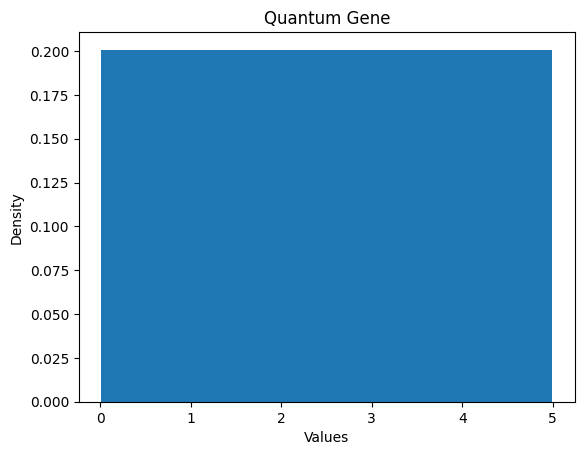

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import uniform
 
width = 5  # Desired width of the interval
lower_bound = 0  # Desired lower bound of the interval

# Calculate the upper bound based on the desired width and lower bound
upper_bound = lower_bound + width

# Generate random numbers from the modified uniform distribution
values = np.random.uniform(lower_bound, upper_bound, 1000) 
count, bins, ignored = plt.hist(values, bins=1, density=True)
plt.plot()
plt.title('Quantum Gene')
plt.ylabel('Density')
plt.xlabel('Values')
plt.show()

# Generating Quantum Population

## Generating Quantum Chromosomes

Quantum Genes:


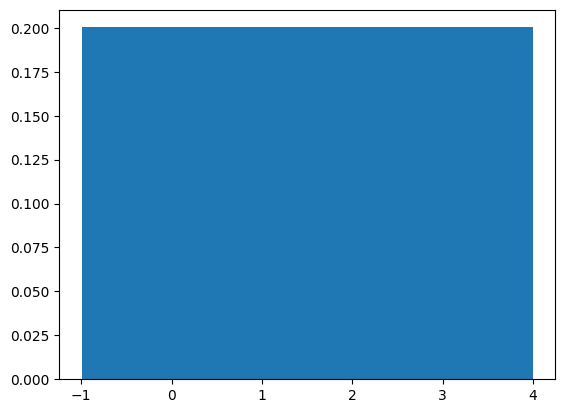

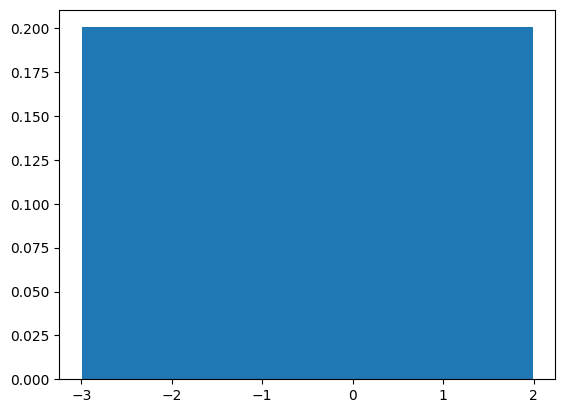

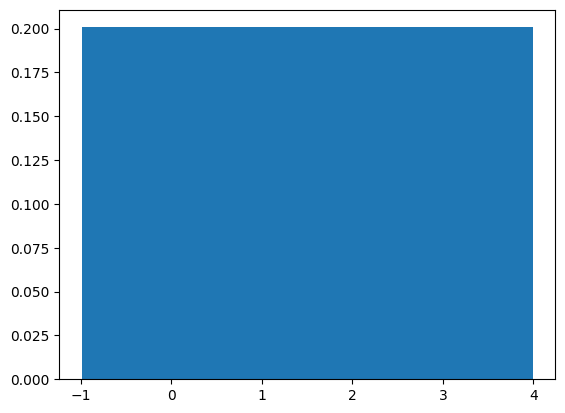

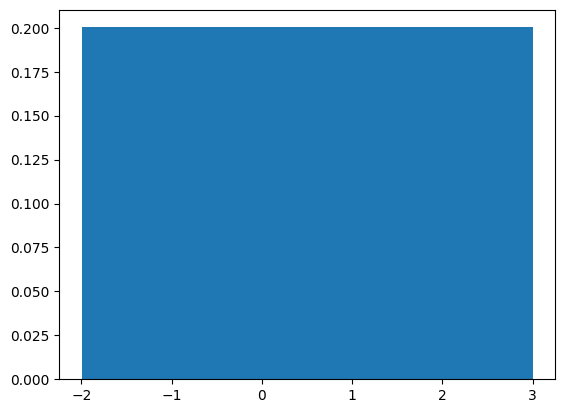

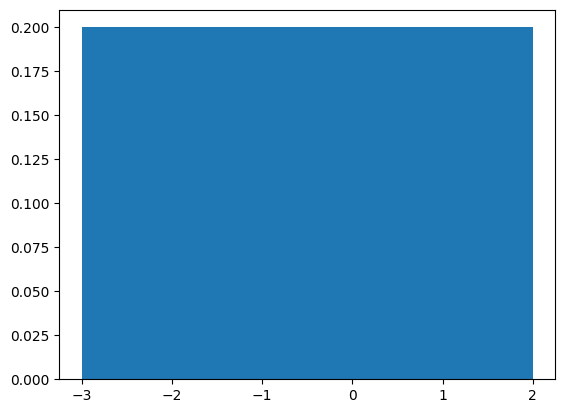

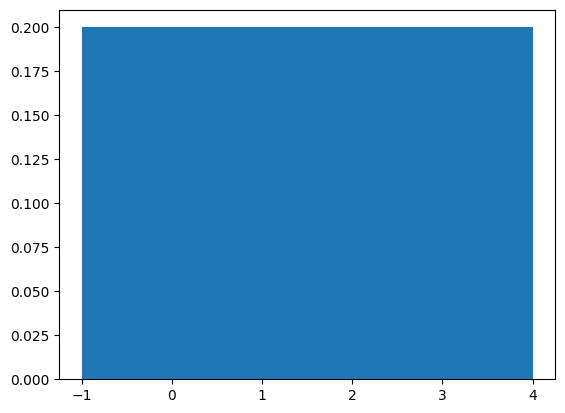

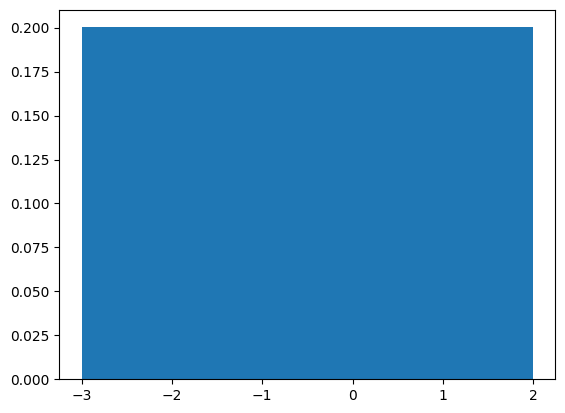

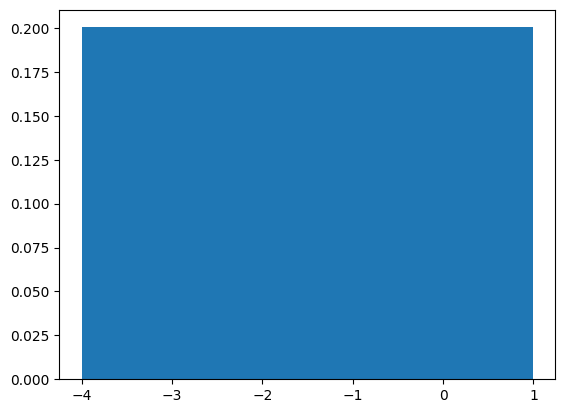

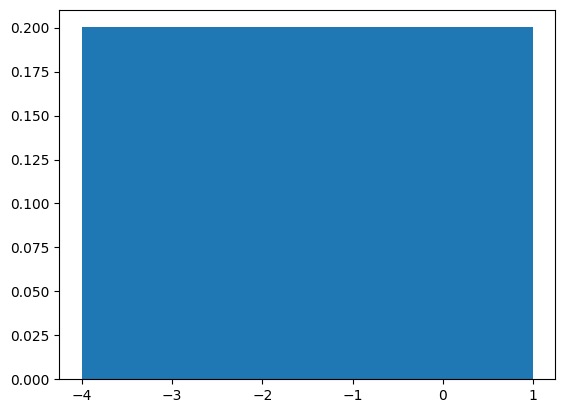

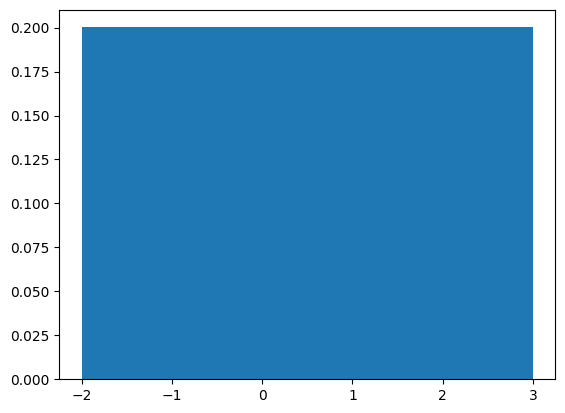

[-1, -3, -1, -2, -3, -1, -3, -4, -4, -2]


In [2]:
import random
chro=[]
print("Quantum Genes:")
i=0
while(i<10):
     y = random.randrange(-5,0)
     width = 5  # Desired width of the interval
     lower_bound = y  # Desired lower bound of the interval

     # Calculate the upper bound based on the desired width and lower bound
     upper_bound = lower_bound + width

     # Generate random numbers from the modified uniform distribution
     values = np.random.uniform(lower_bound, upper_bound, 1000) 
     chro.append(y)
     count, bins, ignored = plt.hist(values, 1, density=True)
     plt.plot()
     plt.show()
     i+=1
print(chro)


## Interference effect

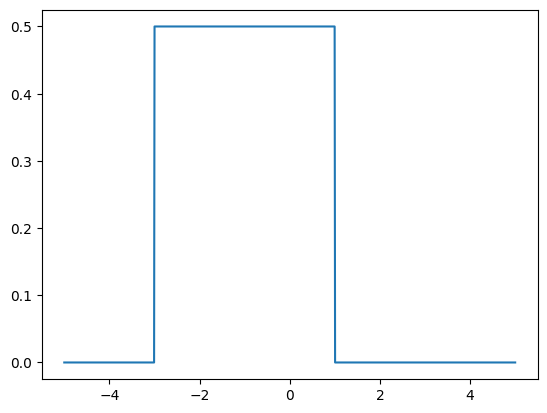

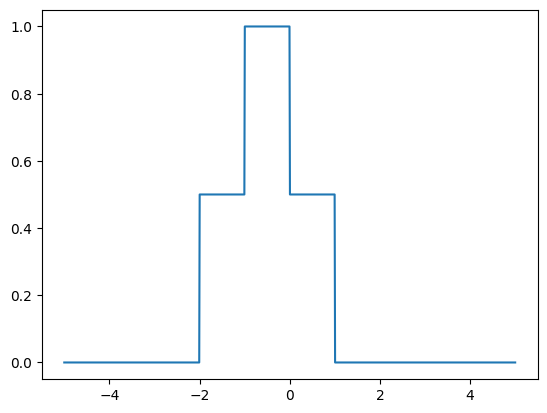

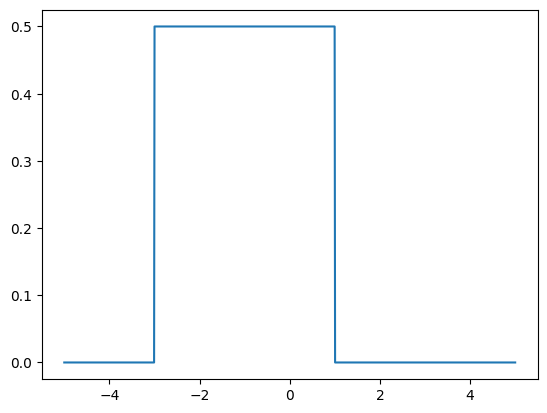

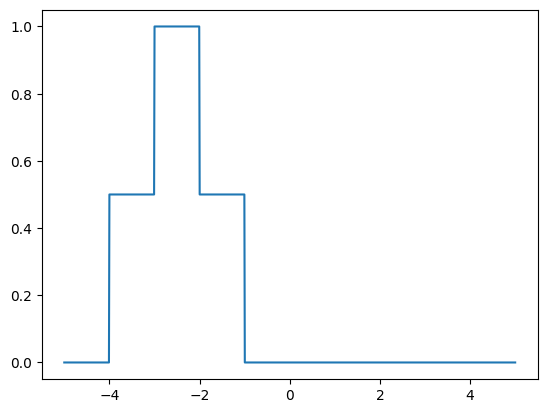

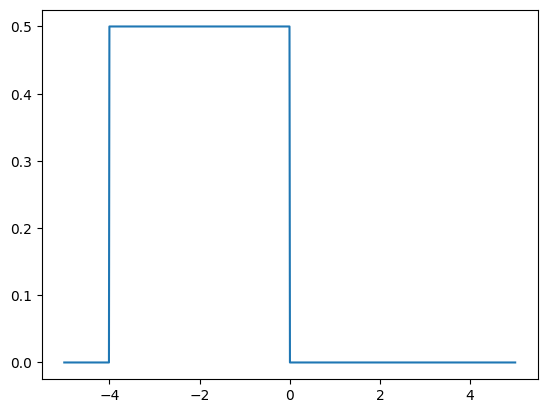

In [3]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

range_pdf=[]
dist=[]
pdf=[]

i=0
# Define the ranges of the uniform distributions
while(i<10):
  range_pdf.append([chro[i], chro[i]+2])
  i+=1

i=0
while(i<10):
# Create 6 uniform distributions
  dist.append(uniform(loc=range_pdf[i][0], scale=range_pdf[i][1]-range_pdf[i][0]))
  i+=1

# Generate an array of x values for the PDF
x = np.linspace(-5, 5, 1000)

i=0
# Add the PDFs of the two distributions together
while(i<10):
  pdf.append(dist[i].pdf(x) + dist[i+1].pdf(x))
  i+=2

i=0
# Plot the resulting PDF
while(i<5):
  plt.plot(x, pdf[i])
  plt.show()
  i+=1


## Computing CDF

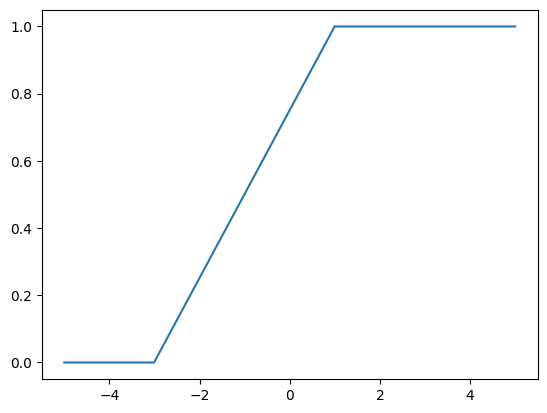

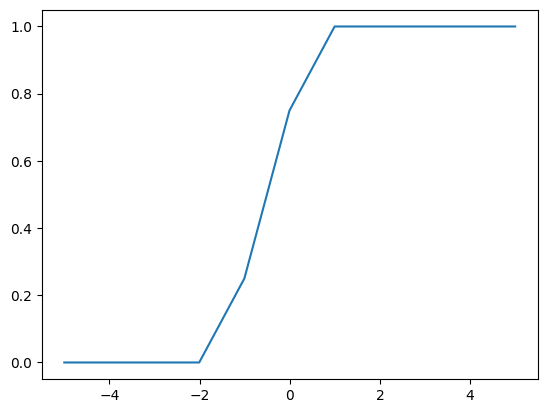

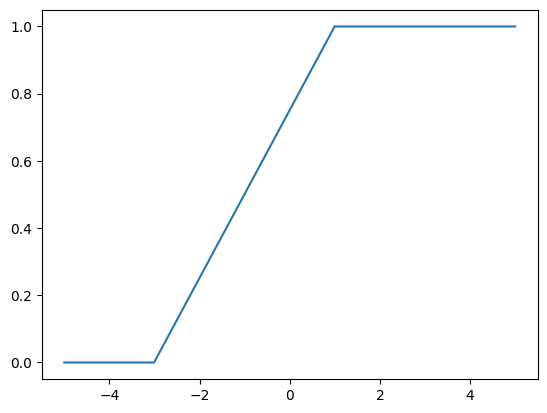

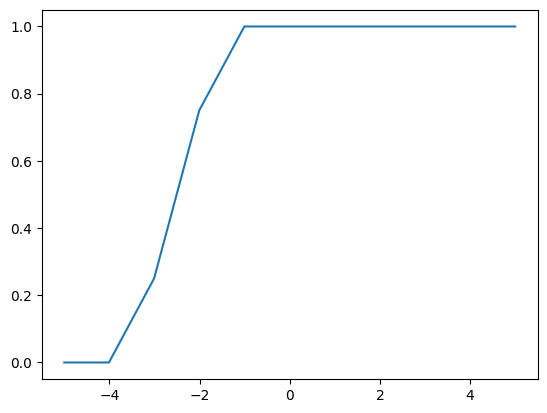

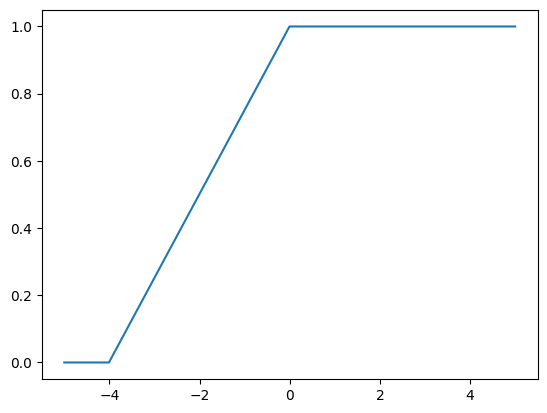

In [4]:
cdf=[]
for i in range(5):
  pdf[i]=pdf[i]/200
  cdf.append(np.cumsum(pdf[i]))
i=0
# Plot the resulting PDF
while(i<5):
  plt.plot(x, cdf[i])
  plt.show()
  i+=1

# Generating Classical Population

In [5]:
random_num=[]
for i in range(5):
  inverted_arr = np.flip(cdf[0])
  temp=[]
  for j in range(6):
   # Generate a random number within the range
    y_value = random.randint(0, 999)
    x_value=inverted_arr[y_value]
    temp.append(x_value)
  random_num.append(temp)
print(random_num)

[[0.0, 0.9999999999999897, 0.7849999999999943, 0.32250000000000023, 0.0, 0.0], [0.9999999999999897, 0.8374999999999931, 0.9999999999999897, 0.14250000000000007, 0.9999999999999897, 0.5249999999999998], [0.9999999999999897, 0.9549999999999906, 0.0, 0.0, 0.9999999999999897, 0.7374999999999953], [0.0, 0.9999999999999897, 0.09250000000000004, 0.564999999999999, 0.9999999999999897, 0.6624999999999969], [0.06500000000000002, 0.9999999999999897, 0.9999999999999897, 0.9999999999999897, 0.25250000000000017, 0.9999999999999897]]


In [6]:
val=[]
k=-5
for i in range(16):
        val.append(round(k,2))
        k+=(2/3)
print(val)

[-5, -4.33, -3.67, -3.0, -2.33, -1.67, -1.0, -0.33, 0.33, 1.0, 1.67, 2.33, 3.0, 3.67, 4.33, 5.0]


In [7]:
def get_nearest_value(lst, value):
    closest_val = None
    min_diff = float('inf')
    for x in lst:
        diff = abs(x - value)
        if diff < min_diff:
            closest_val = x
            min_diff = diff
    return closest_val

# Example usage:
nv=[]

for i in range(5):
  nearest_value=[]
  for j in range(6):
    nearest_value.append(get_nearest_value(val, random_num[i][j]))
  nv.append(nearest_value)
print(nv)

[[-0.33, 1.0, 1.0, 0.33, -0.33, -0.33], [1.0, 1.0, 1.0, 0.33, 1.0, 0.33], [1.0, 1.0, -0.33, -0.33, 1.0, 1.0], [-0.33, 1.0, 0.33, 0.33, 1.0, 0.33], [0.33, 1.0, 1.0, 1.0, 0.33, 1.0]]


# Classical Genetic Algorithm

In [8]:
import random
import math

def classify(t,a,b):
    if(t<a):
        return 1
    elif(t<b):
        return 2
    else:
        return 3
    
#Using Rastrigin function
def obj_fn_calc(acv,n,l,obj):
    obj_fn=10*n
    for k in range(l):
        sum=0
        for i in range(n):
            sum+=acv[k][i]**2-10*math.cos(2*math.pi*acv[k][i])
        obj.append(obj_fn+sum)

def new_obj_fn_calc(acv,n,obj):
    obj_fn=10*n
    for k in range(3):
        sum=0
        for i in range(n):
            sum+=acv[k+3][i]**2-10*math.cos(2*math.pi*acv[k+3][i])
        obj.append(obj_fn+sum)

def pop_act_calc(actual_value,population,gv,n,l): #change some values to generate 6 chromosomes
    for k in range(l):
        chr=''
        temp=[]
        for i in range(n):
            key = [ke for ke, v in gv.items() if v == nv[i][k]][0]
            chr+=key
            temp.append(nv[i][k])
        actual_value.append(temp)
        population.append(chr)

def new_act_calc(av,pop,gv):
    t=0
    for k in range(3):
        tem=[]
        for t in range(0,20,4):
            chr=pop[3+k][t:t+4]
            tem.append(gv[chr])
        av.append(tem)

def sample_chromo():
    loop=0
    gene=["0000","0001","0010","0011","0100","0101","0110","0111","1000","1001","1010","1011","1100","1101","1110","1111"]
    val=[]
    population=[]
    k=-5
    for i in range(16):
        val.append(round(k,2))
        k+=(2/3)
    # print(gene)     #genes
    # print(val)      #values
    gv={}
    m=15
    n=5
    l=6
    for i in range(m+1):
        gv[gene[i]]=val[i]
    # print(gv)       #dictionary consisting of genes and their values
    actual_value=[]
    pop_act_calc(actual_value,population,gv,n,l)
    # print("Actual value: ",actual_value)
    print("Population: ",population) 
    obj_fn_val=[]
    obj_fn_calc(actual_value,n,l,obj_fn_val)
    print("Objective function value: ",obj_fn_val)
    
      #Selection process
    selected=[-1,-1,-1]
    for i in range(3):
        min=1000000000
        for j in range(l):
            if(min>obj_fn_val[j] and j!=selected[0]):
                min=obj_fn_val[j]
                selected[i]=j
    selected.sort()
    # print(selected)
    flag=0
    while(flag==0):
      #Child generation using Roulette wheel
      prob=[]
      p=[]
      parent=[]
      for i in range(3):
          prob.append(1/(1+obj_fn_val[selected[i]]))
      # print(prob)
      for i in range(3):
          p.append(prob[i]/(prob[0]+prob[1]+prob[2]))
      # print(p)
      a=p[0]
      b=p[0]+p[1]
      for i in range(3):
          r1=random.random()
          r2=random.random()
          p1=classify(r1,a,b)
          p2=classify(r2,a,b)
          parent.append((p1,p2))
      # print("Parents: ",parent)
    
      #Cross-over
      child=[]
      for i in range(3):
          r=random.randint(0,19)
          str=population[selected[parent[i][0]-1]][0:r+1]+population[selected[parent[i][1]-1]][r+1:]
          child.append(str)
      
      #mutation
      for i in range(3):
          r1=random.randint(0,19)
          r2=random.randint(0,19)
          while(r1==r2):
              r2=random.randint(0,19)
          if(child[i][r1]==1):
              child[i]=child[i][:r1]+'0'+child[i][r1+1:]
          else:
              child[i]=child[i][:r1]+'1'+child[i][r1+1:]
          if(child[i][r2]==1):
              child[i]=child[i][:r2]+'0'+child[i][r2+1:]
          else:
              child[i]=child[i][:r2]+'1'+child[i][r2+1:]
      # print("Child: ",child)

      #New Population 
      new_population=[]
      new_actual_value=[]
      new_obj_fn_val=[]
      for i in range(3):
          new_population.append(population[selected[i]])
          new_actual_value.append(actual_value[selected[i]])
          new_obj_fn_val.append(obj_fn_val[selected[i]])
      for i in range(3):
          new_population.append(child[i])
      print("\nNew Population: ",new_population)
      new_act_calc(new_actual_value,new_population,gv)
      # print(new_actual_value)
      new_obj_fn_calc(new_actual_value,n,new_obj_fn_val)
      print("New objective function value: ",new_obj_fn_val) 

      #best chromosome
      optimal_soln=[-1,-1]
      for i in range(2):
          min=1000000000
          for j in range(3,l):
              if(min>new_obj_fn_val[j] and j!=optimal_soln[0]):
                  min=new_obj_fn_val[j]
                  optimal_soln[i]=j
      optimal_soln.sort()
      best=[]
      best_fn=[]
      for i in optimal_soln:
        best.append(new_population[i])
        best_fn.append(new_obj_fn_val[i])
      

      #next iteration
      
      for i in range(3,6):
        chk=new_obj_fn_val[i]
        for j in range(3):
          t=new_obj_fn_val[j]
          if(chk<t):
            flag+=1
            break
      if(flag>0):
          break
      if(flag==0):
        print("\nSince children are not better than the parents, creating new children")
    return best,gv,best_fn

best_chr,gv,best_val=sample_chromo()

Population:  ['01111001100101111000', '10011001100110011001', '10011001011110001001', '10001000011110001001', '01111001100110011000', '01111000100110001001']
Objective function value:  [46.77931022305146, 5.0, 32.85287348203431, 60.70574696406862, 32.85287348203431, 46.77931022305146]

New Population:  ['10011001100110011001', '10011001011110001001', '10011001011110001001', '10011001011110001001', '11011001011110001001', '10011001101111011001']
New objective function value:  [5.0, 32.85287348203431, 32.85287348203431, 32.85287348203431, 60.13931022305146, 51.532873482034304]

Since children are not better than the parents, creating new children

New Population:  ['10011001100110011001', '10011001011110001001', '10011001011110001001', '10011001100110011101', '10011101100110011001', '11011001100110011001']
New objective function value:  [5.0, 32.85287348203431, 32.85287348203431, 32.286436741017155, 32.286436741017155, 32.286436741017155]


In [9]:
print(best_val)

[32.286436741017155, 32.286436741017155]


In [10]:
val_iter=[]
chr_iter=[]
val_iter.append(best_val[0])
chr_iter.append(best_chr[0])
flag2=0
print(best_val[0])

32.286436741017155


## NEXT ITERATION

In [11]:
max_iter=1
while(max_iter<50 or flag2==1):
  chro=[]
  print("\nIteration ",max_iter," : ")
  i=0
  while(i<5):
    for j in range(2):
      bc=best_chr[j][4*i:4*(i+1)]
      y = gv[bc]
      values = np.random.uniform(y-0.5, y+0.5) 
      chro.append(y)
    i+=1
  
  range_pdf=[]
  dist=[]
  pdf=[]

  i=0
  # Define the ranges of the uniform distributions
  while(i<10):
    range_pdf.append([chro[i], chro[i]+2])
    i+=1

  i=0
  while(i<10):
  # Create 6 uniform distributions
    dist.append(uniform(loc=range_pdf[i][0], scale=range_pdf[i][1]-range_pdf[i][0]))
    i+=1

  # Generate an array of x values for the PDF
  x = np.linspace(-5, 5, 1000)

  i=0
  # Add the PDFs of the two distributions together
  while(i<10):
    pdf.append(dist[i].pdf(x) + dist[i+1].pdf(x))
    i+=2
  
  cdf=[]
  for i in range(5):
    pdf[i]=pdf[i]/200
    cdf.append(np.cumsum(pdf[i]))

  random_num=[]
  for i in range(5):
    inverted_arr = np.flip(cdf[0])
    temp=[]
    for j in range(6):
    # Generate a random number within the range
      y_value = random.randint(0, 999)
      x_value=inverted_arr[y_value]
      temp.append(x_value)
    random_num.append(temp)
  
  def get_nearest_value(lst, value):
    closest_val = None
    min_diff = float('inf')
    for x in lst:
        diff = abs(x - value)
        if diff < min_diff:
            closest_val = x
            min_diff = diff
    return closest_val

  # Example usage:
  nv=[]

  for i in range(5):
    nearest_value=[]
    for j in range(6):
      nearest_value.append(get_nearest_value(val, random_num[i][j]))
    nv.append(nearest_value)

  print(nv)

  def classify(t,a,b):
    if(t<a):
        return 1
    elif(t<b):
        return 2
    else:
        return 3
      
  #Using Rastrigin function
  def obj_fn_calc(acv,n,l,obj):
      obj_fn=10*n
      for k in range(l):
          sum=0
          for i in range(n):
              sum+=acv[k][i]**2-10*math.cos(2*math.pi*acv[k][i])
          obj.append(obj_fn+sum)

  def new_obj_fn_calc(acv,n,obj):
      obj_fn=10*n
      for k in range(3):
          sum=0
          for i in range(n):
              sum+=acv[k+3][i]**2-10*math.cos(2*math.pi*acv[k+3][i])
          obj.append(obj_fn+sum)

  def pop_act_calc(actual_value,population,gv,n,l): #change some values to generate 6 chromosomes
      for k in range(l):
          chr=''
          temp=[]
          for i in range(n):
              key = [ke for ke, v in gv.items() if v == nv[i][k]][0]
              chr+=key
              temp.append(nv[i][k])
          actual_value.append(temp)
          population.append(chr)

  def new_act_calc(av,pop,gv):
      t=0
      for k in range(3):
          tem=[]
          for t in range(0,20,4):
              chr=pop[3+k][t:t+4]
              tem.append(gv[chr])
          av.append(tem)

  def sample_chromo():
      loop=0
      gene=["0000","0001","0010","0011","0100","0101","0110","0111","1000","1001","1010","1011","1100","1101","1110","1111"]
      val=[]
      population=[]
      k=-5
      for i in range(16):
          val.append(round(k,2))
          k+=(2/3)
      # print(gene)     #genes
      # print(val)      #values
      gv={}
      m=15
      n=5
      l=6
      for i in range(m+1):
          gv[gene[i]]=val[i]
      # print(gv)       #dictionary consisting of genes and their values
      actual_value=[]
      pop_act_calc(actual_value,population,gv,n,l)
      # print("Actual value: ",actual_value)
      print("Population: ",population) 
      obj_fn_val=[]
      obj_fn_calc(actual_value,n,l,obj_fn_val)
      print("Objective function value: ",obj_fn_val)
      
        #Selection process
      selected=[-1,-1,-1]
      for i in range(3):
          min=1000000000
          for j in range(l):
              if(min>obj_fn_val[j] and j!=selected[0] and j!=selected[1]):
                  min=obj_fn_val[j]
                  selected[i]=j
      selected.sort()
      # print(selected)
      flag=0
      while(flag==0):
        #Child generation using Roulette wheel
        prob=[]
        p=[]
        parent=[]
        for i in range(3):
            prob.append(1/(1+obj_fn_val[selected[i]]))
        # print(prob)
        for i in range(3):
            p.append(prob[i]/(prob[0]+prob[1]+prob[2]))
        # print(p)
        a=p[0]
        b=p[0]+p[1]
        for i in range(3):
            r1=random.random()
            r2=random.random()
            p1=classify(r1,a,b)
            p2=classify(r2,a,b)
            parent.append((p1,p2))
        # print("Parents: ",parent)
      
        #Cross-over
        child=[]
        for i in range(3):
            r=random.randint(0,19)
            str=population[selected[parent[i][0]-1]][0:r+1]+population[selected[parent[i][1]-1]][r+1:]
            child.append(str)
        
        #mutation
        for i in range(3):
            r1=random.randint(0,19)
            r2=random.randint(0,19)
            while(r1==r2):
                r2=random.randint(0,19)
            if(child[i][r1]==1):
                child[i]=child[i][:r1]+'0'+child[i][r1+1:]
            else:
                child[i]=child[i][:r1]+'1'+child[i][r1+1:]
            if(child[i][r2]==1):
                child[i]=child[i][:r2]+'0'+child[i][r2+1:]
            else:
                child[i]=child[i][:r2]+'1'+child[i][r2+1:]
        # print("Child: ",child)

        #New Population 
        new_population=[]
        new_actual_value=[]
        new_obj_fn_val=[]
        for i in range(3):
            new_population.append(population[selected[i]])
            new_actual_value.append(actual_value[selected[i]])
            new_obj_fn_val.append(obj_fn_val[selected[i]])
        for i in range(3):
            new_population.append(child[i])
        print("\nNew Population: ",new_population)
        new_act_calc(new_actual_value,new_population,gv)
        # print(new_actual_value)
        new_obj_fn_calc(new_actual_value,n,new_obj_fn_val)
        print("New objective function value: ",new_obj_fn_val)    

        flag=0
        flag4=0
        for i in range(3,6):
          chk=new_obj_fn_val[i]
          flag3=0
          for j in range(3):
            t=new_obj_fn_val[j]
            if(chk<t):
              flag3+=1
          if(flag3>=1):
            flag+=1
            if(flag3==3):
              flag4+=1
        if(flag>0):
          #best chromosome
          optimal_soln=[-1,-1]
          for i in range(2):
              min=1000000000
              for j in range(l):
                  if(min>new_obj_fn_val[j] and j!=optimal_soln[0]):
                      min=new_obj_fn_val[j]
                      optimal_soln[i]=j
          best=[]
          best_fn=[]
          for i in optimal_soln:
            best.append(new_population[i])
            best_fn.append(new_obj_fn_val[i])
          break
        if(flag==0):
          print("\nSince children are not better than the parents, creating new children")
      return best,best_fn,flag4

  best_chr,best_val,flag4=sample_chromo()

  print(best_val)
  print(best_chr)
  print(best_val[0])
  print(best_chr[0])
  val_iter.append(best_val[0])
  chr_iter.append(best_chr[0])
  max_iter+=1
  if(max_iter==50):
      print("\nStopping the QGA since max iterations are reached")
  elif(flag4==3):
      print("\nStopping the QGA since all the children are better than the parents")
 


Iteration  1  : 
[[1.0, -0.33, -0.33, -0.33, -0.33, -0.33], [-0.33, -0.33, -0.33, -0.33, -0.33, 0.33], [-0.33, 1.0, 1.0, -0.33, -0.33, 1.0], [-0.33, -0.33, -0.33, 1.0, -0.33, 1.0], [1.0, 0.33, -0.33, 1.0, 0.33, -0.33]]
Population:  ['10010111011101111001', '01110111100101111000', '01110111100101110111', '01110111011110011001', '01110111011101111000', '01111000100110010111']
Objective function value:  [46.77931022305146, 60.70574696406862, 60.70574696406862, 46.77931022305146, 74.63218370508577, 46.77931022305146]

New Population:  ['10010111011101111001', '01110111011110011001', '01111000100110010111', '10010111011110011101', '11010111011101111001', '10010111011101111101']
New objective function value:  [46.77931022305146, 46.77931022305146, 46.77931022305146, 60.13931022305146, 74.06574696406861, 74.06574696406861]

Since children are not better than the parents, creating new children

New Population:  ['10010111011101111001', '01110111011110011001', '01111000100110010111', '01110111

**Considering Stopping Criteria as either of the two:**

**-> Maximum number of Iterations as 50**

**-> If all the children are better than the parents**

# Visualization of QGA's best solutions at every iteration

Text(0.5, 1.0, 'Iteration-wise Best Value Chart')

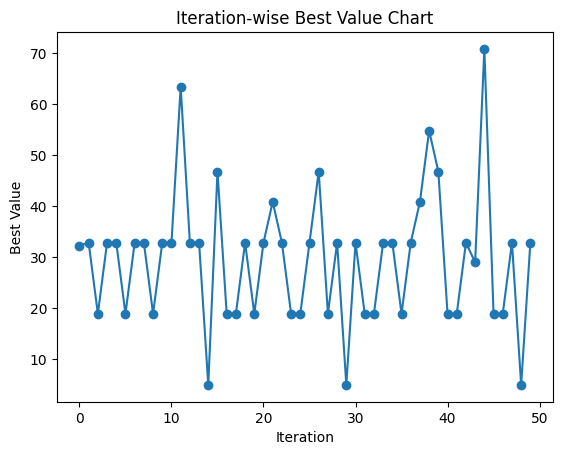

In [12]:
import matplotlib.pyplot as plt

# Plot the best values as a line chart
plt.plot(val_iter, '-o')

# Add labels to the chart
plt.xlabel('Iteration')
plt.ylabel('Best Value')
plt.title('Iteration-wise Best Value Chart')

**Even after the interference of all the quantum genes there is randomness in the above graph since the quantum genes are in superpositioned state so there is no guarentee that the next iteration is better than the present iteration as the range of states that a quantum gene is large.**

# Best solution

In [13]:
min=100
for i in range(max_iter):
  if(val_iter[i]<min):
    min=val_iter[i]
    pos=i
print("Best solution: ",val_iter[pos])
print("Best value solution: ",chr_iter[pos])

Best solution:  5.0
Best value solution:  10011001100110011001
